In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import savgol_filter
from matplotlib.offsetbox import AnchoredText

In [2]:
def fl(x):
    return round(x,2)

## Household consumption

We start by initializing some energy consumption for a set of 10 houses, each with 5 rooms/devices. We defined the time span of these measurements to be 90 (days, for instance).

In [11]:
number_of_houses = 10
number_of_rooms = 5
Tmax = 90
energy_cons_house = np.zeros((Tmax, number_of_houses, number_of_rooms))
energy_cons_house.shape

(90, 10, 5)

Having done that, we generate random numbers between 0 and 1, which correspond to some measure of energy cons. for each one of the rooms, and houses.

In [12]:
for t in range(Tmax):
    for nh in range(number_of_houses):
        energy_cons_house[t][nh] = np.random.random(number_of_rooms)

The next plot shows how this looks when the some time steps are fixed. Every barplot shows the consumption per room. The numbers at the end of each row correspond to the cummulative measure of the houses of that row.

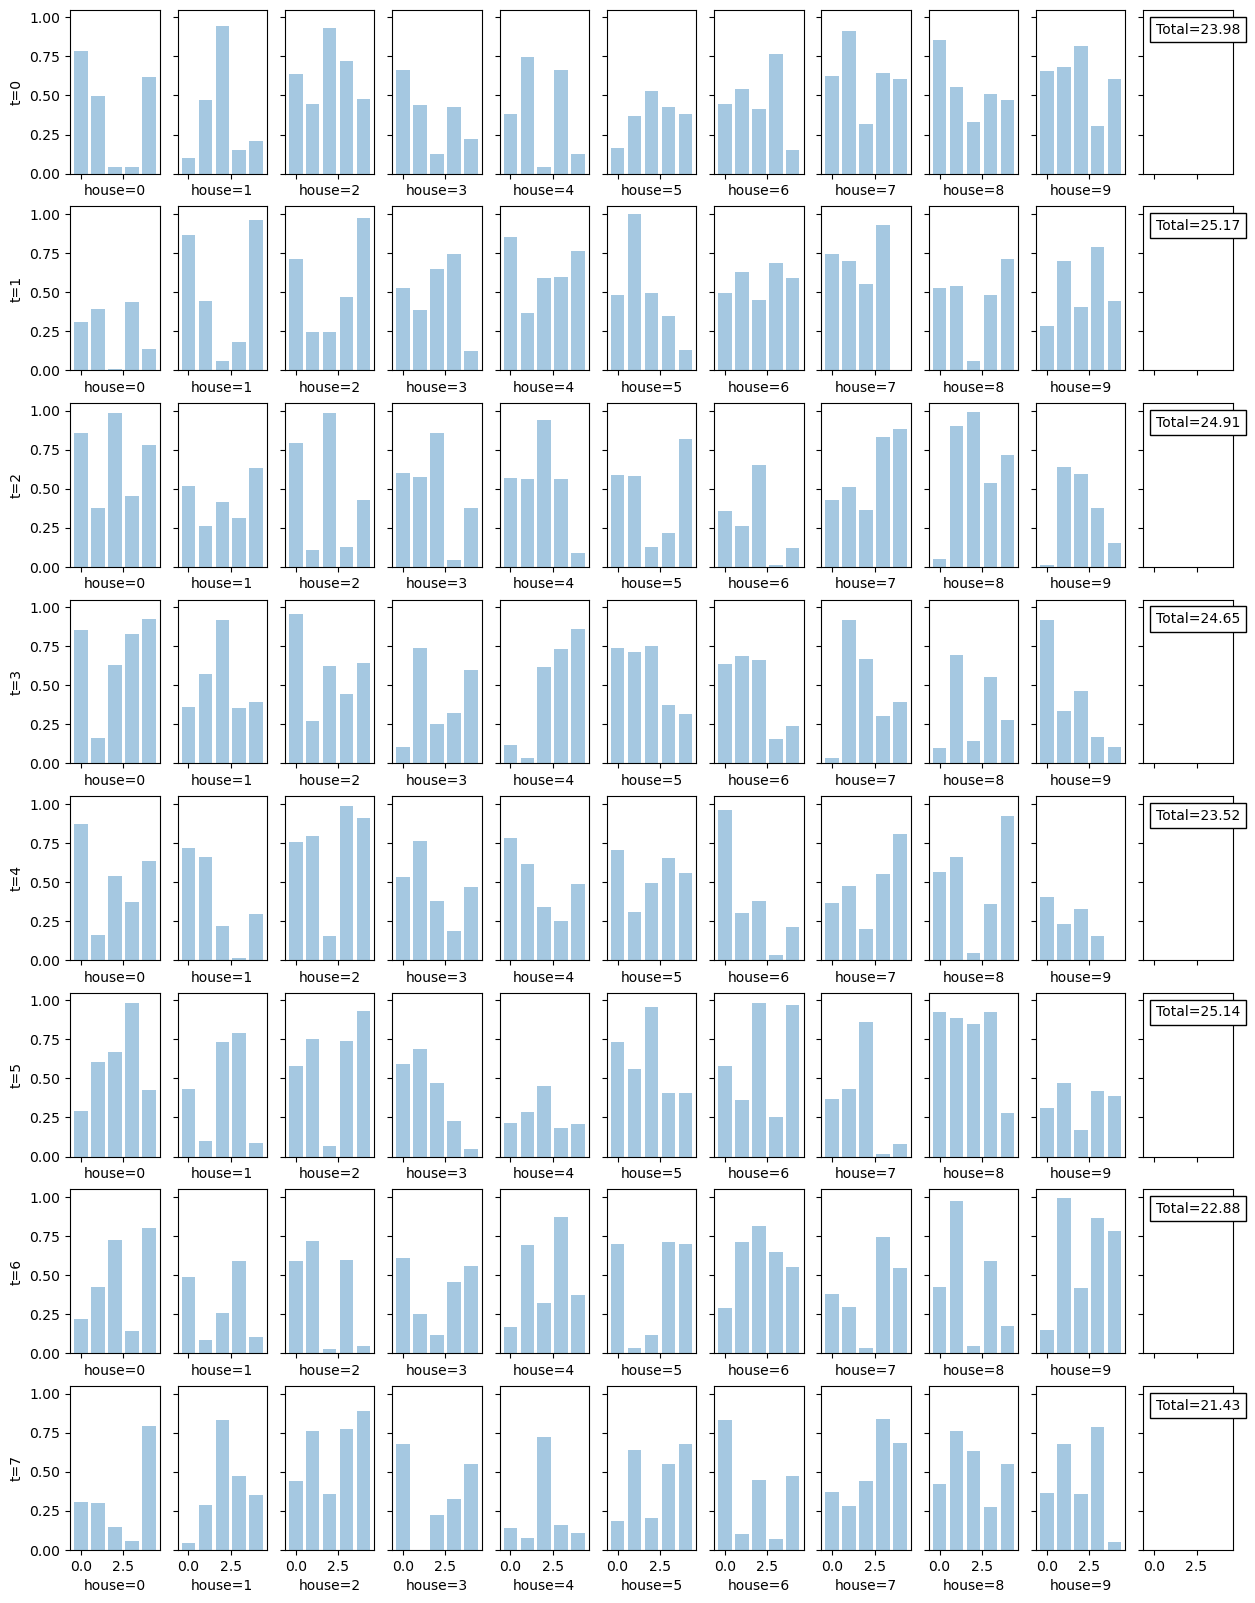

In [254]:
fig, axs = plt.subplots(8, 11, figsize=(15, 20), sharey=True, sharex = True)
total = np.zeros(8)
for t in range(8):#Tmax
    total_temp = []
    axs[t][0].set_ylabel('t='+str(t))
    for house_number in range(10+1):
        # access cons of a house 
        if house_number!=10:
            energy_cons_fixed_house = energy_cons_house[t][house_number]
            total_temp+=list(energy_cons_fixed_house)
            axs[t][house_number].bar(range(number_of_rooms), energy_cons_fixed_house, alpha = 0.4)
            #axs[t][house_number].title.set_text('t='+str(t))
            axs[t][house_number].set_xlabel('house='+str(house_number))
        if house_number == 10:
            at = AnchoredText(
                "Total="+str(fl(sum(total_temp))), prop=dict(size=10), frameon=True, loc='upper left')

            axs[t][house_number].add_artist(at)
    total[t]=fl(sum(total_temp)) # storing the sum used in the last column (per row)

## Overall Consumption

Once this information has been generated, we can proceed to compute overall values per time step.

In [13]:
total = np.zeros(Tmax)

for t in range(Tmax):#Tmax
    total_temp = []
    
    for house_number in range(number_of_houses):
        
        energy_cons_fixed_house = energy_cons_house[t][house_number]
        
        total_temp+=list(energy_cons_fixed_house)
        
        total[t]=fl(sum(total_temp)) # storing the sum used in the last column (per row)

The plot of this evolution can be seen in the next cell. We also used a polynomal interpolators to get a more smoother version of these measurements. 

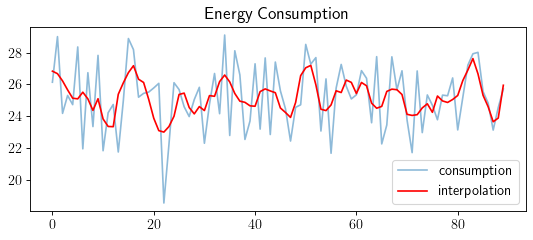

In [15]:
#x = np.linspace(0,2*np.pi,100)
#y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(total, 8, 3) # window size 8, polynomial order 3

plt.figure(figsize=(8, 3), dpi=80)
plt.plot(total, alpha = .5, label = 'consumption')
plt.plot(yhat, color='red',label = 'interpolation')
plt.title('Energy Consumption')
plt.legend()
plt.show()

The next step would be to predict what the consumption and generation plots would be for the short future. For simplicity we assumed that the consumptiona dn the generation curves have closed forms, and then we restrict our "views" of the data assuming that it corresponds to measured values. We assume that the consecutive values correspond to some predictions. This could be done in realistic scenearios by using some more suitable predictors, like non-linear regression, LASSO, ....  

In [3]:
plt.rcParams.update({'font.size': 13})
plt.rcParams['text.usetex'] = True

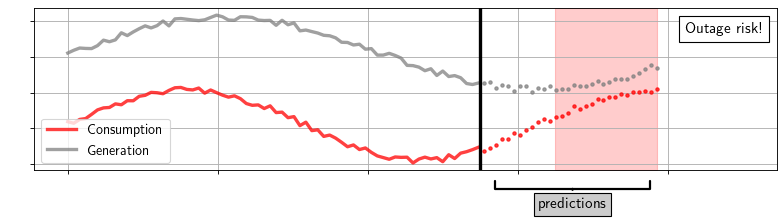

In [10]:
#%matplotlib notebook
x0 = np.linspace(0,2.5*np.pi,100)
consumption = np.sin(x0) + np.random.random(100) * 0.2
generation = np.sin(0.75*x0) + np.random.random(100) * 0.2

#x_idx for prediction
idx = -30

fig, ax = plt.subplots(figsize=(10, 3), dpi=80)
# existing data
plt.plot(x0[:idx], consumption[:idx], alpha = .75, label = 'Consumption', lw=3, color = 'red')
plt.plot(x0[:idx], generation[:idx]+2, alpha = .75, label = 'Generation',lw = 3, color = 'gray')
plt.legend(loc = 'lower left')

# prediction
plt.plot(x0[idx:], consumption[idx:], '.', alpha = .75, label = 'Prediction', lw=3, color = 'red' )
plt.plot(x0[idx:], generation[idx:]+2,'.', alpha = .75, label = 'Prediction',lw = 3, color = 'gray')

plt.axvline(x=5.5, color = 'black', lw = 3)

ax.fill_between([6.5,max(x0)], 0, 1,
                 color='red', alpha=0.2, transform=ax.get_xaxis_transform())

at = AnchoredText(
                "Outage risk!",prop=dict(size=14), frameon=True, loc='upper right')


ax.annotate('predictions', xy=(0.725, -0.1), xytext=(0.725, -0.25),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=5.0, lengthB=.5', lw=2.0))


plt.scatter(9,0,color = 'white')
ax.add_artist(at)
#plt.title('Energy Landscape')
plt.yticks(color='w')
plt.xticks(color='w')
plt.grid()
plt.tight_layout()
plt.savefig('outage-risk.png', dpi = 100)
plt.show()

In the previously presented plot, we saw the (known and predicted) evolution of the consumption and the generation. We say that there's a **_high risk_** of outage if the predicted curves get very close to each other. 

Our way of dealing with this is asking the users to reduce their consumption. This can be seen as turning off some of the bars of the previously shown barplots, for a particular user.  

In [19]:
#q1: user
# turn in off, when, for how long
def turn_off_on_house_barplot(energy_cons_house, house_number, start, end, room_number):
    temp_Tmax = 20
    fig, axs = plt.subplots(temp_Tmax, 1, figsize=(2, 20), sharey=True, sharex = True)
    #total = np.zeros(8)
    for t in range(temp_Tmax):#Tmax
#         total_temp = []
        axs[t].set_ylabel('t='+str(t))
        if end>= t >= start:
            energy_cons_house[t][house_number][room_number] = 0
        energy_cons_fixed_house_row = energy_cons_house[t][house_number]
#       total_temp+=list(energy_cons_fixed_house)
        axs[t].bar(range(number_of_rooms), energy_cons_fixed_house_row, alpha = 0.4)
        #axs[t][house_number].title.set_text('t='+str(t))
        axs[t].set_xlabel('house='+str(house_number))

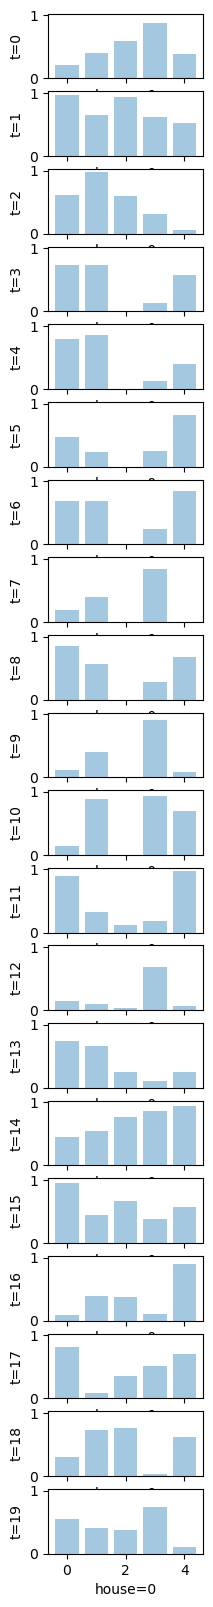

In [246]:
start = 3
end = 10
room_number = 2
house_number = 0
turn_off_on_house_barplot(energy_cons_house,house_number, start, end, room_number)

If enough users accept to help, the energy consumption will be reduced, and the gap between the consumption and the generation curves will increased!  This will then help the company avoiding a blackout.

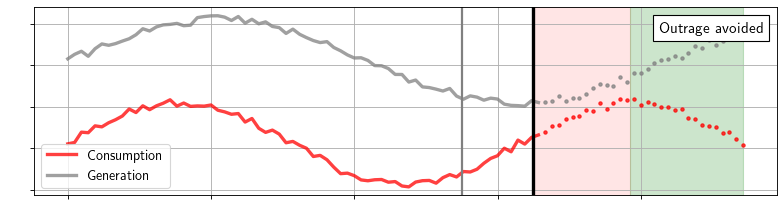

In [20]:
x = np.linspace(0,3*np.pi,100)
#consumption = np.sin(x0) + np.random.random(100) * 0.2
#generation = np.sin(0.75*x0) + np.random.random(100) * 0.2

consumption = np.sin(x) + np.random.random(100) * 0.2
generation = np.sin(0.75*x) + np.random.random(100) * 0.2

#x_idx for prediction
idx = -30

fig, ax = plt.subplots(figsize=(10, 3), dpi=80)
# existing data
plt.plot(x[:idx], consumption[:idx], alpha = .75, label = 'Consumption', lw=3, color = 'red')
plt.plot(x[:idx], generation[:idx]+2, alpha = .75, label = 'Generation',lw = 3, color = 'gray')
plt.legend(loc = 'lower left')

# prediction
plt.plot(x[idx:], consumption[idx:], '.', alpha = .75, label = 'Prediction', lw=3, color = 'red' )
plt.plot(x[idx:], generation[idx:]+2,'.', alpha = .75, label = 'Prediction',lw = 3, color = 'gray')

plt.axvline(x=5.5, color = 'gray', lw = 2)
plt.axvline(x=6.5, color = 'black', lw = 3)

ax.fill_between([6.5,max(x0)], 0, 1,
                 color='red', alpha=0.1, transform=ax.get_xaxis_transform())

at = AnchoredText(
                "Outrage avoided", prop=dict(size=14), frameon=True, loc='upper right')

ax.fill_between([max(x0),max(x)], 0, 1,
                color='green', alpha=0.2, transform=ax.get_xaxis_transform())

plt.scatter(9,0,color = 'white', s = 0)
ax.add_artist(at)

plt.yticks(color='w')
plt.xticks(color='w')
plt.grid()
plt.tight_layout()

plt.show()